Author:  Raphael Cousin

Project: https://github.com/racousin/algorithms_basics_python

# Theory

__Context:__

* Data : $X_1,..,X_n \sim f$ where $f$ is a density with support $I = [a,b]$ 

* estimator: $\hat{f}_h(x)=\frac{1}{h} \sum_{i=1}^n K(\frac{x - X_i}{h})$, with K a kernel function

* sample size: $n$

In [1]:
from scipy.stats import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.discriminant_analysis import LinearClassifierMixin

In [2]:
np.random.seed(seed=233423)
n = 10000
gauss = norm(loc=0, scale=1)
rnorm = lambda n : gauss.rvs(n)

In [30]:
class kernel(BaseEstimator, LinearClassifierMixin):
    def __init__(self, h = 0.2, K='gauss'):
        self.f_hat = None
        self.h = h
        self.f_K = None
        opt_tmp = np.sqrt(np.pi)
        if K == 'gauss':
            self.f_K = lambda x : np.exp(-x**2)/ opt_tmp
    def fit(self, X):
        def f_hat(xs):
            res = np.zeros(len(xs));
            for _,x in enumerate(xs):
                res[_] = self.f_K((x - X) / self.h).mean() / self.h
            return res
        self.f_hat = f_hat
        
    def predict(self, x):
        return self.f_hat(x)
    

    def plot(self, X):
        return np.sign(self.decision_function(X))

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


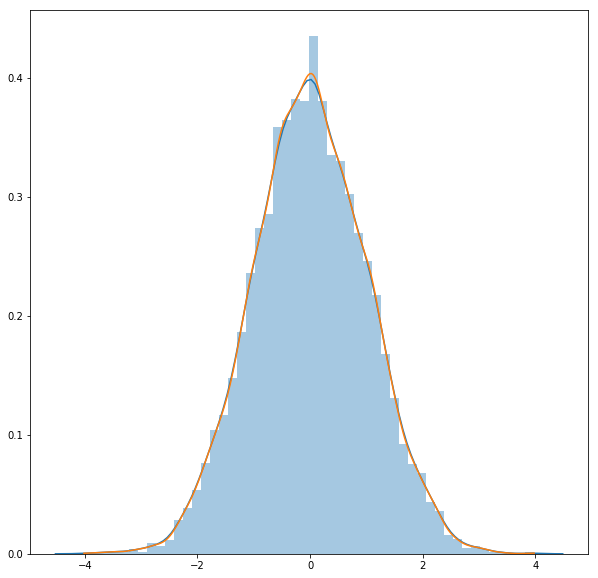

In [31]:
X = rnorm(n)
kern = kernel()
kern.fit(X)
xs = np.linspace(X.min(),X.max(),300)
fig,ax = plt.subplots(figsize = (10,10))
sns.distplot(X)
ax.plot(xs, kern.predict(xs))